# KNN

In [8]:
from util.functions import impute_and_train
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


In [9]:
from sklearn.model_selection import cross_val_score

dataframe = pd.read_csv('processed/df_numeric.csv',).dropna()

max_accuracies = {}

X = dataframe.drop(columns='class')
y = dataframe['class']
accuracies: dict[int, float] = {}
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv = 5)
    accuracies[k] = scores.mean()
max(accuracies.items(), key=lambda x: x[1])

(1, 0.8245059288537548)

For each of the imputation methods, the maximum accuracy could be achieved using a number of neighbors of 1. Therefore, for the model selection, we will use the number of neighbors of 1.

In [10]:

model = KNeighborsClassifier(n_neighbors=1)

results = impute_and_train(model)

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

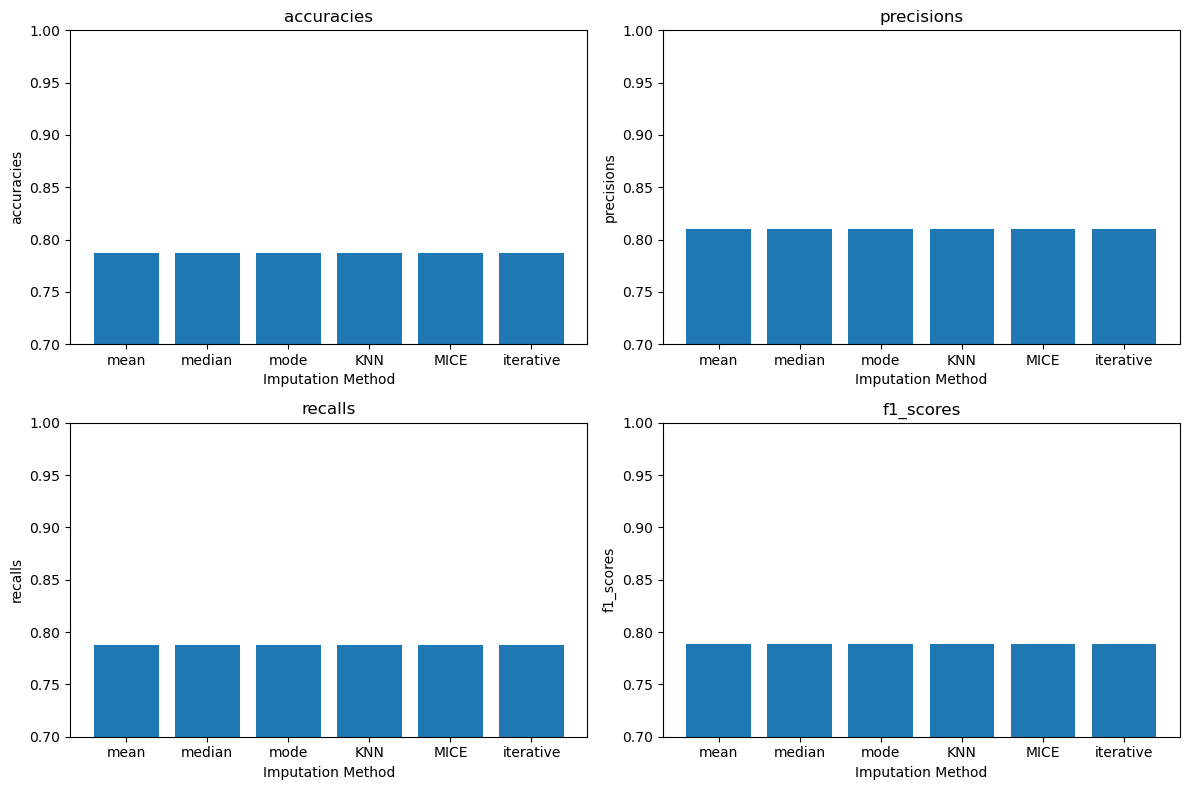

In [11]:
from util.functions import plot_metrics
plot_metrics(results['metrics'])


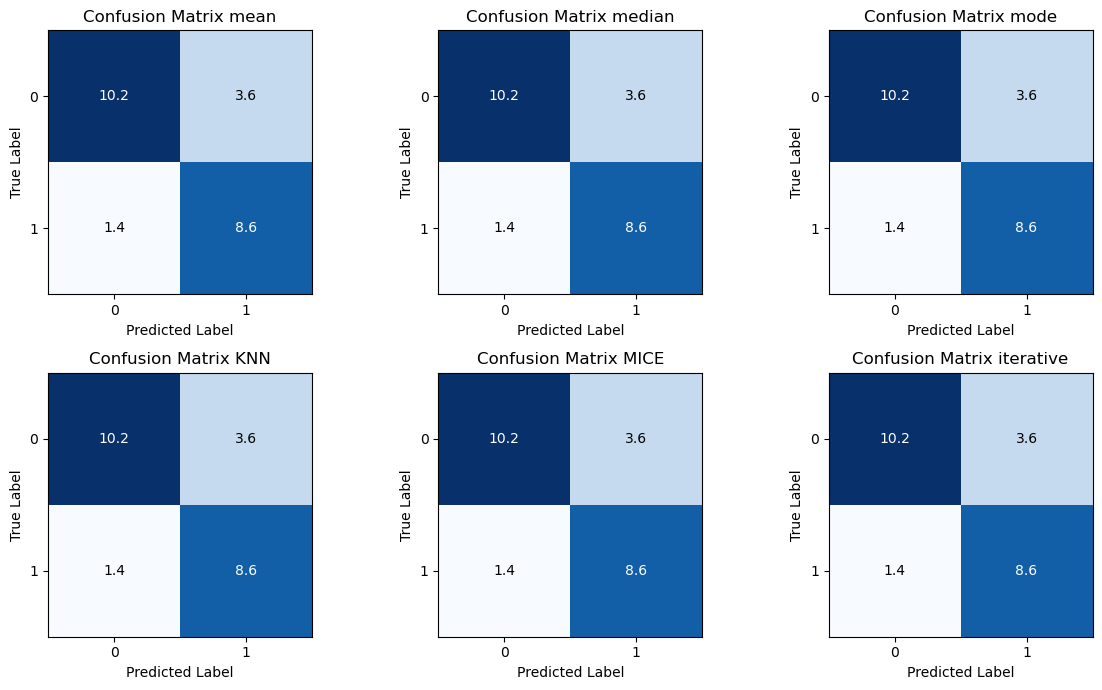

In [12]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

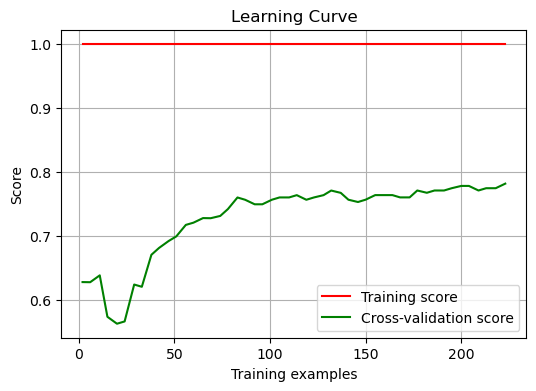

In [13]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

In [14]:
#feature importances
# todo